# **Module Project - FEATURISATION & MODEL TUNING**
### Auther: *Nayan Sonawane*

### **DOMAIN:**  Semiconductor manufacturing process
**CONTEXT:** A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/
variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific
monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers
typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature
selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors
contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning
and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out
different combinations of features, essential signals that are impacting the yield type can be identified.

**DATA DESCRIPTION:** sensor-data.csv : (1567, 592)
<br>The data consists of 1567 examples each with 591 features.
The dataset presented in this case represents a selection of such features where each example represents a single production entity with
associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to
a pass and “1” corresponds to a fail and the data time stamp is for that specific test point

### **PROJECT OBJECTIVE:**
We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.

### Steps:
1. Import and explore the data.
2. Data cleansing:
• Missing value treatment.
• Drop attribute/s if required using relevant functional knowledge.
• Make all relevant modifications on the data using both functional/logical reasoning/assumptions.
3. Data analysis & visualisation:
• Perform detailed relevant statistical analysis on the data.
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.
4. Data pre-processing:
• Segregate predictors vs target attributes
• Check for target balancing and fix it if found imbalanced.
• Perform train-test split and standardise the data or vice versa if required.
• Check if the train and test data have similar statistical characteristics when compared with original data
5. Model training, testing and tuning:
• Model training:
- Pick up a supervised learning model.
- Train the model.
- Use cross validation techniques.
Hint: Use all CV techniques that you have learnt in the course.
- Apply hyper-parameter tuning techniques to get the best accuracy.
Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.
- Use any other technique/method which can enhance the model performance.
Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.
- Display and explain the classification report in detail.
- Design a method of your own to check if the achieved train and test accuracies might change if a different sample population can lead to
new train and test accuracies.
Hint: You can use your concepts learnt under Applied Statistics module.
- Apply the above steps for all possible models that you have learnt so far.
• Display and compare all the models designed with their train and test accuracies.
• Select the final best trained model along with your detailed comments for selecting this model.
• Pickle the selected model for future use.
• Import the future data file. Use the same to perform the prediction using the best chosen model from above. Display the prediction results.
6. Conclusion and improvisation:
• Write your conclusion on the results.

### Step 1: Import and explore the data

In [1]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Not always recommended, but jsut so our notebook looks clean for this activity

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#%cd /content/drive/MyDrive/GL_Learning/Assignments/FMT/
df = pd.read_csv("signal-data.csv")  # Read the data regarding singal

/content/drive/MyDrive/GL_Learning/Assignments/FMT


In [4]:
print(df.shape)
df.head()

(1567, 592)


,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,...,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,...,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,...,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,...,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,...,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


Observation: 
Data contains 592 columns and 1567 rows.
First column is data and time type and Timestep is not equal.

In [5]:
# Check datatype of the features
df.dtypes.value_counts()

float64    590
object       1
int64        1
dtype: int64

Observation: 590 columns are of float datatype. First column is object and Target column is int

### Step 2: Data cleansing

In [6]:
# Checking NA values in each column
df.isna().apply(pd.value_counts) # isna() gives a boolean dataframe, value counts give us number of trues and falses

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
False,1567.0,1561,1560,1553,1553,1553,1553,1553,1558,1565,1565,1565,1565,1565,1564,1564,1564,1564,1564,1564,1557,1567.0,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1566,1566,1566,1566,1566,1566,1566,...,1307,1307,1307,1307,1307,1307,1307,1566,1566,1566,1566,1294,1294,1294,1294,1294,1294,1294,1294,1567.0,1567.0,1567.0,1567.0,1567.0,1567.0,1567.0,1567.0,618,618,618,618,1566,1566,1566,1566,1566,1566,1566,1566,1567.0
True,NaN,6,7,14,14,14,14,14,9,2,2,2,2,2,3,3,3,3,3,3,10,NaN,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,...,260,260,260,260,260,260,260,1,1,1,1,273,273,273,273,273,273,273,273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,949,949,949,949,1,1,1,1,1,1,1,1,NaN


Observation: Almost every Sensor data column contains Na values. 
1. It is important to check the columns with more that 10% of NA values since imputation of these values may affect Model and its accuracy. (10% is 157)
2. Columns with more than 40% of missing/NA data will be removed since it cant be used for modelling.(From General ML guideline) (40% is 627)

In [7]:
Null_sum = df.isna().sum()# Since True is 1 and False is 0, if you do a sum of a boolean dataframe, we get the number of trues in each col
print(Null_sum.sort_values(ascending=False))

157     1429
292     1429
293     1429
158     1429
85      1341
        ... 
255        0
291        0
359        0
360        0
Time       0
Length: 592, dtype: int64


In [8]:
df.isnull().apply(pd.value_counts) # isna() and isnull() are exactly the same 

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
False,1567.0,1561,1560,1553,1553,1553,1553,1553,1558,1565,1565,1565,1565,1565,1564,1564,1564,1564,1564,1564,1557,1567.0,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1566,1566,1566,1566,1566,1566,1566,...,1307,1307,1307,1307,1307,1307,1307,1566,1566,1566,1566,1294,1294,1294,1294,1294,1294,1294,1294,1567.0,1567.0,1567.0,1567.0,1567.0,1567.0,1567.0,1567.0,618,618,618,618,1566,1566,1566,1566,1566,1566,1566,1566,1567.0
True,NaN,6,7,14,14,14,14,14,9,2,2,2,2,2,3,3,3,3,3,3,10,NaN,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,...,260,260,260,260,260,260,260,1,1,1,1,273,273,273,273,273,273,273,273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,949,949,949,949,1,1,1,1,1,1,1,1,NaN


In [9]:
### Removing columns with more than 40% missing data 

# Obtaining the columns indices with more than 40% missing values
column_index = df.columns[(df.isnull().sum()>627)]
print(column_index)

# Removing columns with more than 40% missing data since these are not usefull for modelling
df_Clean_1 = df.drop(column_index, axis=1)

# Check datatype of the features
df_Clean_1.dtypes.value_counts()

Index(['72', '73', '85', '109', '110', '111', '112', '157', '158', '220',
       '244', '245', '246', '247', '292', '293', '345', '346', '358', '382',
       '383', '384', '385', '492', '516', '517', '518', '519', '578', '579',
       '580', '581'],
      dtype='object')


float64    558
object       1
int64        1
dtype: int64

In [10]:
df_Clean_1.shape

(1567, 560)

Observation: After removing columns with 40% missing data, we have 560 valid data columns including predictor 

In [11]:
# Checking columns with less than 10% data missing and imputing them with linear interpolation with DataTime index
df_clean_2 = df_Clean_1.drop(['Pass/Fail'], axis=1)
df_clean_2['Time'] = df_clean_2['Time'].astype('datetime64[ns]')

df_clean_2.set_index('Time', inplace=True)

column_index = df_clean_2.columns[(df_clean_2.isnull().sum()<157)];
df_clean_2_interpolate = df_clean_2[column_index];

df_clean_2_interpolate.interpolate(method= 'linear', axis=1, inplace=True)

df_clean_2_interpolate.shape

(1567, 538)

In [12]:
df_clean_2_interpolate.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,558,559,560,561,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,...,0.5064,6.6926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0570,4.0825,11.5074,0.1096,0.0078,0.0026,7.116,1.0344,0.4385,0.1039,42.3877,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,2.3630,2.3630,2.3630,2.3630
2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,...,0.8832,8.8370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7910,2.9799,9.5796,0.1096,0.0078,0.0026,7.116,0.9634,0.1745,0.0375,18.1087,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,...,0.6451,6.4568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1538,2.9667,9.3046,0.1096,0.0078,0.0026,7.116,1.5021,0.3718,0.1233,24.7524,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,...,0.7404,6.4865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1565,3.2465,7.7754,0.1096,0.0078,0.0026,7.116,1.1613,0.7288,0.2710,62.7572,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,...,2.2181,6.3745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0579,1.9999,9.4805,0.1096,0.0078,0.0026,7.116,0.9778,0.2156,0.0461,22.0500,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [13]:
# Filling remaining values with pad method
df_clean_2_interpolate.fillna(method='pad', inplace=True);
df_clean_2_interpolate.isna().sum().sum()

0

Observation: After imputing missing values in column (less that 10% data) using linear interpolation, we have 538 columns for modelling (without Time and predictor).
We will keep aside 20 sensor data columns (having missing data in between 10-40% for futher analyis if required)

In [14]:
# Imputing missing values from 157 to 627 by KNN method
column_index = df_clean_2.columns[(df_clean_2.isnull().sum()>157)];
df_clean_2_knn = df_clean_2[column_index];
df_clean_2_knn.shape

(1567, 20)

### Exploratory Data Analysis and visualisation

In [15]:
# Describe the numerical data
df_clean_2_interpolate.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1567.0,3014.319036,73.633717,2743.240000,2966.32500,3011.3200,3056.54000,3356.350000
1,1567.0,2496.263139,80.477908,2158.750000,2452.88500,2499.7200,2539.54000,2846.440000
2,1567.0,2200.057449,30.511722,2037.241667,2180.76665,2200.9556,2218.05550,2318.776086
3,1567.0,1399.519100,441.029242,0.000000,1083.88580,1287.3538,1600.38580,3715.041700
4,1567.0,16.225257,138.948563,0.681500,1.01770,1.3171,1.52960,1546.328257
...,...,...,...,...,...,...,...,...
585,1567.0,3.070189,3.578113,1.197500,2.30650,2.7577,3.29575,99.303200
586,1567.0,0.022953,0.060428,-0.016900,0.01345,0.0205,0.02760,2.363000
587,1567.0,0.017972,0.059928,0.003200,0.01060,0.0148,0.02035,2.363000
588,1567.0,0.006788,0.059629,0.001000,0.00330,0.0046,0.00640,2.363000


Observation: There are many columns with maximum values very large than that of 75% value.

In [16]:
# checking class balance for target variable
print('Target values:', df_Clean_1['Pass/Fail'].unique())

# Target values , Pass = -1 and Fail = 1
df_Clean_1['Pass/Fail'].value_counts()

Target values: [-1  1]


-1    1463
 1     104
Name: Pass/Fail, dtype: int64

Observation: Target values are biased towards Pass (-1) with (1463/1567 =) 93.36% data and has very less Fail data (6.64%)

In [17]:
# Checking correlation between independent attributes for Collinearity/linear dependence in data
y = df_Clean_1['Pass/Fail']

df_clean = pd.concat([df_clean_2_interpolate, df_Clean_1['Pass/Fail'].reindex(df_clean_2_interpolate.index)],axis=1)
df_clean.shape
cor = df_clean.corr() # It will show correlation of only numerical variables here.

In [18]:
# Checking class distribition over univariate and Bivariate plots
#df_pairplot = sns.pairplot(df_clean, hue='Pass/Fail')

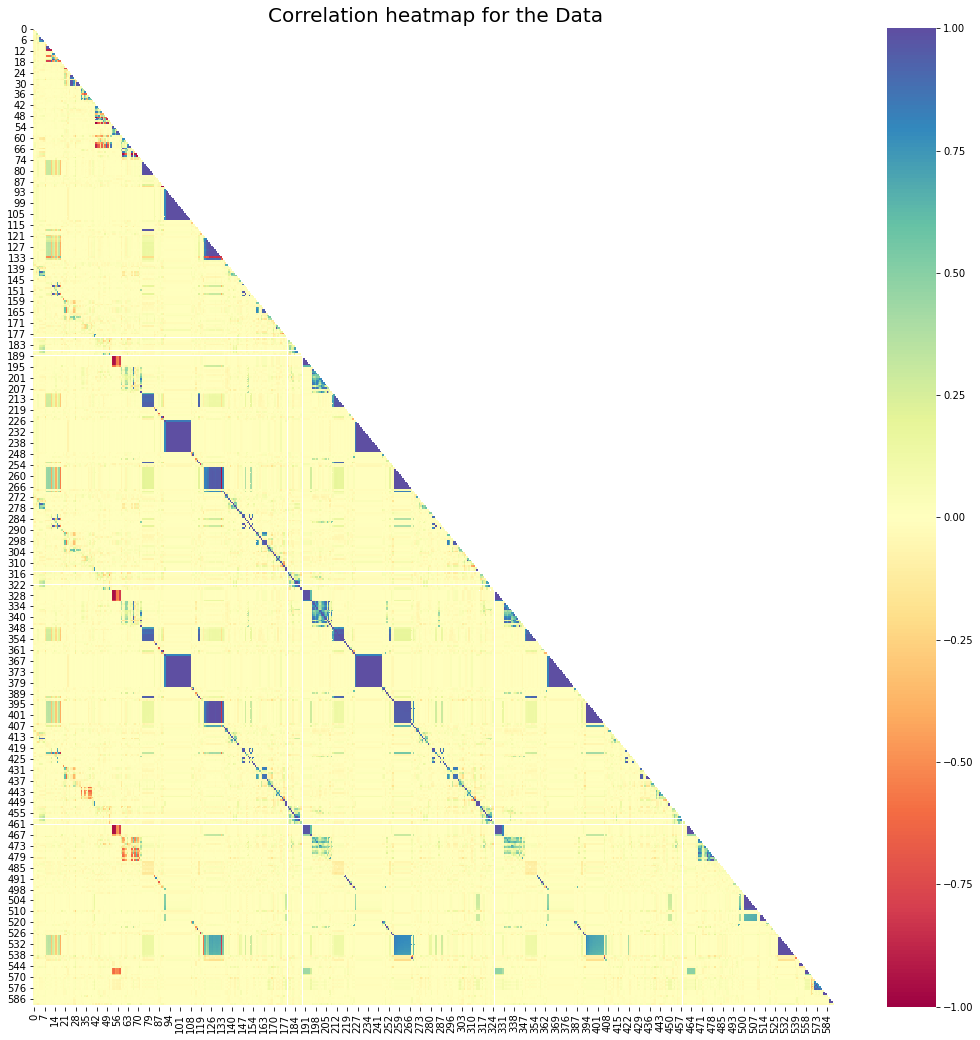

In [19]:
# Plotting heatmap to know about highly correlated features
plt.rcParams['figure.figsize'] = (18, 18);
matrix = np.triu(cor)
sns.heatmap(cor, cmap = "Spectral", mask=matrix, center=0)
plt.title('Correlation heatmap for the Data', fontsize = 20);

Observation: It can be observed that lot of sensor column (near to each other) are having high correlation. This may be due to sensors are places physically near to each other.

In [20]:
# Removing highly correlated features (absolute values of 0.8) from the data
iters = range(len(cor.columns) - 1)
drop_cols = []
# Iterate through the correlation matrix and compare correlations
for i in iters:
    for j in range(i+1):
        item = cor.iloc[j:(j+1), (i+1):(i+2)]
        col = item.columns
        row = item.index
        val = abs(item.values)

        # If correlation exceeds the threshold
        if val >= 0.8:
            # Print the correlated features and the correlation value
            # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
            drop_cols.append(col.values[0])
drops = set(drop_cols)
df_clean = df_clean.drop(columns=drops)

# Print the size of the data
df_clean.shape

(1567, 179)

Obsevation: After removing highly correlated columns, only 179 columns are present for modelling.

In [21]:
df_clean.head()

,0,1,2,3,4,8,9,13,14,15,16,19,20,21,22,23,24,25,28,32,33,35,36,37,40,41,42,44,45,47,48,51,53,56,59,60,61,62,63,67,...,461,468,469,472,475,476,480,482,483,484,485,486,487,488,489,496,498,499,500,501,510,511,512,521,525,539,541,542,545,558,561,570,571,572,573,582,585,586,589,Pass/Fail
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,1.5005,0.0162,0.0,7.9558,414.8710,10.0433,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,64.2333,83.3971,9.5126,64.2588,49.3830,66.3141,61.29,4.515,70.0,10.1841,130.3691,1.3072,141.2282,218.3174,4.592,0.9317,-1.7264,350.9264,10.6231,108.6427,16.1445,0.9226,...,0.0,311.6377,5.7277,63.7987,2.3394,31.9893,115.7408,613.3069,291.4842,494.6996,178.1759,843.1138,0.0000,53.1098,0.0000,17.1202,0.0,0.0000,0.0000,0.0,64.6707,0.0000,0.0,0.0,3.1406,2.0570,11.5074,0.1096,7.116,1.0344,42.3877,533.8500,2.1113,8.95,0.3157,0.5005,2.3630,2.3630,2.3630,NaN
2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,1.4966,-0.0005,0.0,10.1548,414.7347,9.2599,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,68.4222,84.9052,9.7997,64.2828,49.3404,64.9193,78.25,2.773,70.0,10.0373,133.1727,1.2887,145.8445,205.1695,4.590,0.9324,0.8073,352.0073,10.3092,113.9800,10.9036,1.1598,...,0.0,463.2883,5.5652,73.5536,2.1627,30.8643,163.0249,0.0000,246.7762,0.0000,359.0444,130.6350,820.7900,194.4371,0.0000,12.6788,0.0,0.0000,0.0000,0.0,141.4365,0.0000,0.0,0.0,3.1310,1.7910,9.5796,0.1096,7.116,0.9634,18.1087,535.0164,2.4335,5.92,0.2653,0.5019,4.4447,0.0096,208.2045,NaN
2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,1.4436,0.0041,0.0,9.5157,416.7075,9.3144,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,67.1333,84.7569,8.6590,64.1114,49.8470,65.8389,14.37,5.434,70.0,9.8783,131.8027,1.2992,141.0845,185.7574,4.486,0.9139,23.8245,364.5364,10.1685,115.6273,11.3019,0.8694,...,0.0,21.3645,5.4178,148.0287,3.1842,13.3923,93.9245,434.2674,151.7665,0.0000,190.3869,746.9150,74.0741,191.7582,250.1742,18.9849,0.0,0.0000,0.0000,0.0,240.7767,244.2748,0.0,0.0,12.1831,2.1538,9.3046,0.1096,7.116,1.5021,24.7524,535.0245,2.0293,11.21,0.1882,0.4958,3.1745,0.0584,82.8602,NaN
2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,1.4882,-0.0124,0.0,9.6052,422.2894,9.6924,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,62.9333,84.9105,8.6789,64.1125,49.4900,65.1951,76.90,1.279,70.0,9.9305,131.8027,1.3027,142.5427,189.9079,4.486,0.9139,24.3791,361.4582,10.2112,116.1818,13.5597,0.9761,...,0.0,24.2831,6.5291,100.0021,3.4234,35.4323,149.4399,225.0169,100.4883,305.7500,88.5553,104.6660,71.7583,0.0000,336.7660,29.2542,0.0,0.0000,711.6418,0.0,113.5593,0.0000,0.0,0.0,6.7553,2.1565,7.7754,0.1096,7.116,1.1613,62.7572,530.5682,2.0253,9.33,0.1738,0.4990,2.0544,0.0202,73.8432,NaN
2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,1.5031,-0.0031,0.0,10.5661,420.5925,10.3387,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,62.8333,86.3269,8.7677,64.1511,49.7520,66.1542,76.39,2.209,70.0,10.4091,176.3136,1.0341,138.0882,233.5491,4.624,0.9298,-12.2945,355.0809,9.7948,144.0191,21.9782,0.9256,...,0.0,44.8980,4.4384,89.9529,4.5375,42.6838,140.1953,171.4486,276.8810,461.8619,240.1781,0.0000,587.3773,748.1781,0.0000,107.6905,0.0,293.1396,0.0000,0.0,148.0663,0.0000,0.0,0.0,2.9954,2.0579,9.4805,0.1096,7.116,0.9778,22.0500,532.0155,2.0275,8.83,0.2224,0.4800,99.3032,0.0202,73.8432,NaN


### Step 4: Data preprocessing for Model building

#### a) Normal data (Not sampled with respect to target)

In [22]:
from sklearn.model_selection import train_test_split # Splitting the data for training and testing out model
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

X = df_clean.drop('Pass/Fail', axis = 1)
y = df_Clean_1['Pass/Fail']

# Creation of Oversampled data for addressing target imbalance (will be used after Normal model)
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X, y)
print(X_over.shape)
print(y_over.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, stratify = y)

In [23]:
#Here we are going to use StandardScaler to scale our data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [24]:
print(y_train.value_counts())
print(y_test.value_counts())

-1    1097
 1      78
Name: Pass/Fail, dtype: int64
-1    366
 1     26
Name: Pass/Fail, dtype: int64


### Step 5. Model training, testing and tuning
a) Logistic regression model trained using all the attributes

Acccuracy: 0.8826530612244898 
Precision: 0.8736022664594093 
Recall: 0.8826530612244898 
F1: 0.8780824829931972 



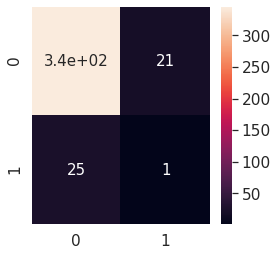

In [25]:
#**Logistic Regression**
from sklearn.linear_model import LogisticRegression #importing logistic regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support

lr = LogisticRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)  # Predictions from logistic regression
lr_Acu_score = lr.score(X_test, y_test)
lr_prec_score, lr_rec_score, lr_f1_score, lr_sup_score = precision_recall_fscore_support(y_test, pred, average='weighted')

print(f"Acccuracy: {lr_Acu_score} \nPrecision: {lr_prec_score} \nRecall: {lr_rec_score} \nF1: {lr_f1_score} \n")

# Plotting Confusion matrox as Heatmap
cm = confusion_matrix(y_test, pred)
plt.rcParams['figure.figsize'] = (4, 4)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15});


b) Decision tree model trained using all the attributes

Acccuracy: 0.7219387755102041 
Precision: 0.8783250186323001 
Recall: 0.7219387755102041 
F1: 0.7872585217253573 



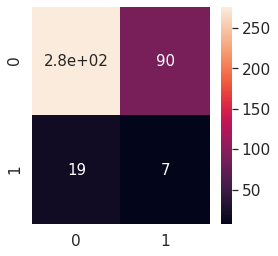

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

pred = dt.predict(X_test)

dt_Acu_score = dt.score(X_test, y_test)
dt_prec_score, dt_rec_score, dt_f1_score, dt_sup_score = precision_recall_fscore_support(y_test, pred, average='weighted')

print(f"Acccuracy: {dt_Acu_score} \nPrecision: {dt_prec_score} \nRecall: {dt_rec_score} \nF1: {dt_f1_score} \n")

# Plotting Confusion matrox as Heatmap
cm = confusion_matrix(y_test, pred)
plt.rcParams['figure.figsize'] = (4, 4)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15});

c) Random forest model trained using all the attributes

Acccuracy: 0.9336734693877551 
Precision: 0.8717461474385673 
Recall: 0.9336734693877551 
F1: 0.9016477303322384 



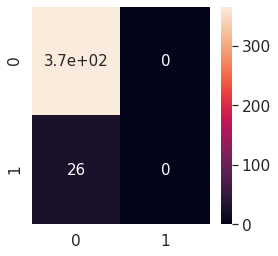

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

pred = rf.predict(X_test)

rf_Acu_score = rf.score(X_test, y_test)
rf_prec_score, rf_rec_score, rf_f1_score, rf_sup_score = precision_recall_fscore_support(y_test, pred, average='weighted')

print(f"Acccuracy: {rf_Acu_score} \nPrecision: {rf_prec_score} \nRecall: {rf_rec_score} \nF1: {rf_f1_score} \n")

# Plotting Confusion matrox as Heatmap
cm = confusion_matrix(y_test, pred)
plt.rcParams['figure.figsize'] = (4, 4)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15});

d) Xgboost model trained using all the attributes


Acccuracy: 0.9285714285714286 
Precision: 0.8900957290132548 
Recall: 0.9285714285714286 
F1: 0.9034230137678415 



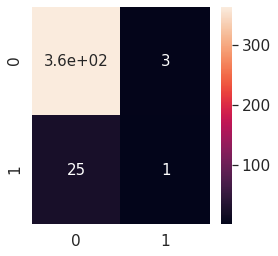

In [28]:
!pip install xgboost;
from xgboost import XGBClassifier

xg = XGBClassifier()

xg.fit(X_train, y_train)

pred = xg.predict(X_test)

xg_Acu_score = xg.score(X_test, y_test)
xg_prec_score, xg_rec_score, xg_f1_score, xg_sup_score = precision_recall_fscore_support(y_test, pred, average='weighted')

print(f"\nAcccuracy: {xg_Acu_score} \nPrecision: {xg_prec_score} \nRecall: {xg_rec_score} \nF1: {xg_f1_score} \n")

# Plotting Confusion matrox as Heatmap
cm = confusion_matrix(y_test, pred)
plt.rcParams['figure.figsize'] = (4, 4)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15});

### 18. Print feature importance
- Print feature importance of Random Forest



In [29]:
#Decision Tree
df_X_train = pd.DataFrame(X_train)
pd.Series(dt.feature_importances_, df_X_train.columns ).sort_values(ascending= False)

34     0.063288
0      0.057330
164    0.046759
114    0.041982
9      0.037077
         ...   
106    0.000000
105    0.000000
104    0.000000
103    0.000000
88     0.000000
Length: 178, dtype: float64

In [30]:
#RandomForest
pd.Series(rf.feature_importances_, df_X_train.columns).sort_values(ascending= False)

128    0.021608
164    0.019150
34     0.016606
138    0.015345
76     0.014969
         ...   
137    0.000000
26     0.000000
136    0.000000
121    0.000000
93     0.000000
Length: 178, dtype: float64

In [31]:
#Xg_boost
pd.Series(xg.feature_importances_, df_X_train.columns).sort_values(ascending= False)

133    0.017598
38     0.016665
29     0.016072
61     0.015009
87     0.013711
         ...   
172    0.000000
74     0.000000
161    0.000000
119    0.000000
155    0.000000
Length: 178, dtype: float32

### Step 5: Model Tuning
- Decision tree model trained using all the attributes
- Random Forest model trained using all the attributes
- Xg Boost model trained using all the attributes
- Fine tuned (using Grid Search or Random Search) Random Forest model

**Display all the scores above with their respective models in a single dataframe**



In [32]:
from sklearn.model_selection import cross_val_score
#For Logistic regression
lr_CVAcu_score = cross_val_score(lr, X_train, y_train, cv = 10).mean()
print(f'Cross validation score of Decision tree = {lr_CVAcu_score}')

Cross validation score of Decision tree = 0.9114660292626395


In [33]:
#For Decision Tree dt
dt_CVAcu_score = cross_val_score(dt, X_train, y_train, cv = 10).mean()
print(f'Cross validation score of Decision tree = {dt_CVAcu_score}')

Cross validation score of Decision tree = 0.8748297841518182


In [34]:
#Random Forest rf
rf_CVAcu_score = cross_val_score(rf, X_train, y_train, cv = 10).mean()
print(f'Cross validation score of Random forest = {rf_CVAcu_score}')

Cross validation score of Random forest = 0.9336230624366217


In [35]:
#Xg boost xgboost
xg_CVAcu_score = cross_val_score(xg, X_train, y_train, cv = 10).mean()
print(f'Cross validation score of Xg boost = {xg_CVAcu_score}')

Cross validation score of Xg boost = 0.93191366072722


#### Parameter Tuning Using RandomizedSearch for RandomForest and Xg Boost

In [36]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [5, 10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [50, 100, 150, 200]}


clf = RandomizedSearchCV(RandomForestClassifier(), parameters, cv = 4, verbose = 2, n_iter=100, n_jobs= 16)
clf.fit(X_train, y_train)

clf.best_params_


Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:   22.2s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:  1.8min
[Parallel(n_jobs=16)]: Done 333 tasks      | elapsed:  4.0min
[Parallel(n_jobs=16)]: Done 400 out of 400 | elapsed:  4.5min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [37]:
## Obtaining best RandomForest model scores
rf = RandomForestClassifier(bootstrap= True,
 max_depth= 50,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 n_estimators= 100)

rf.fit(X_train, y_train)

tunedrf_Acu_score = cross_val_score(rf, X_train, y_train, cv = 5).mean()
tunedrf_Acu_score

0.9327659574468085

In [38]:
## Using Xg boost model for tuning
clf = RandomizedSearchCV(XGBClassifier(), parameters, cv = 4, verbose = 2, n_iter=100, n_jobs= 25)
clf.fit(X_train, y_train)
clf.best_params_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done 112 tasks      | elapsed:  3.3min
[Parallel(n_jobs=25)]: Done 315 tasks      | elapsed:  7.9min
[Parallel(n_jobs=25)]: Done 400 out of 400 | elapsed:  9.8min finished


{'bootstrap': True,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'n_estimators': 50}

In [45]:
## Obtaining best Xg boost model scores
xg = XGBClassifier(bootstrap= True,
 max_depth= 5,
 max_features= 'sqrt',
 min_samples_leaf= 8,
 n_estimators= 50)

xg.fit(X_train, y_train)

tunedxg_Acu_score = cross_val_score(xg, X_train, y_train, cv = 5).mean()
tunedxg_Acu_score

0.9327659574468085

In [42]:
data = {'Technique' : ['Logistic Regression', 'Decision tree', 'Random forest', 'Xg Boost'],
       'Accuracy' : [lr_Acu_score, dt_Acu_score, rf_Acu_score, xg_Acu_score], 'CV Accuracy': [lr_CVAcu_score, dt_CVAcu_score, rf_CVAcu_score, xg_CVAcu_score],
        'Precision' : [lr_prec_score, dt_prec_score, rf_prec_score, xg_prec_score],
        'F1 score' : [lr_f1_score, dt_f1_score, rf_f1_score, xg_f1_score],
        'Tuned Accuracy' : ['Not Calculated', "Not Calculated", tunedrf_Acu_score, tunedxg_Acu_score]}

result = pd.DataFrame(data)
result

,Technique,Accuracy,CV Accuracy,Precision,F1 score,Tuned Accuracy
0,Logistic Regression,0.882653,0.911466,0.873602,0.878082,Not Calculated
1,Decision tree,0.721939,0.874830,0.878325,0.787259,Not Calculated
2,Random forest,0.933673,0.933623,0.871746,0.901648,0.932766
3,Xg Boost,0.928571,0.931914,0.890096,0.903423,0.933617


Observation:
It is seen that Random Forest and Xg Boost gives almost equal performance with Xg boost giving more precision.

We wil proceed with these models for Oversampled dataset

### b) Oversampled data for modelling

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over, random_state = 1, stratify = y_over)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(y_train.shape)
print(y_test.shape)

(2194,)
(732,)


In [52]:
# Random Forest
clf = RandomizedSearchCV(RandomForestClassifier(), parameters, cv = 4, verbose = 2, n_iter=100, n_jobs= 25)
clf.fit(X_train, y_train)
clf.best_params_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done 112 tasks      | elapsed:  2.4min
[Parallel(n_jobs=25)]: Done 315 tasks      | elapsed:  6.3min
[Parallel(n_jobs=25)]: Done 400 out of 400 | elapsed:  7.9min finished


{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [53]:
## Obtaining best RandomForest model scores
rf = RandomForestClassifier(bootstrap= True,
 max_depth= 50,
 max_features= 'auto',
 min_samples_leaf= 1,
 n_estimators= 200)

rf.fit(X_train, y_train)

tunedrfOver_Acu_score = cross_val_score(rf, X_train, y_train, cv = 5).mean()
tunedrfOver_Acu_score

0.9845040097357007

In [54]:
## Using Xg boost model for tuning
clf = RandomizedSearchCV(XGBClassifier(), parameters, cv = 4, verbose = 2, n_iter=100, n_jobs= 25)
clf.fit(X_train, y_train)
clf.best_params_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done 112 tasks      | elapsed:  7.8min
[Parallel(n_jobs=25)]: Done 315 tasks      | elapsed: 20.6min
[Parallel(n_jobs=25)]: Done 400 out of 400 | elapsed: 24.8min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'n_estimators': 200}

In [55]:
## Obtaining best Xg boost model scores
xg = XGBClassifier(bootstrap= True,
 max_depth= 10,
 max_features= 'auto',
 min_samples_leaf= 4,
 n_estimators= 200)

xg.fit(X_train, y_train)

tunedxgOver_Acu_score = cross_val_score(xg, X_train, y_train, cv = 5).mean()
tunedxgOver_Acu_score

0.9735638281274378

In [56]:
data = {'Technique' : ['Random forest', 'Xg Boost'],
        'Tuned Accuracy' : [tunedrfOver_Acu_score, tunedxgOver_Acu_score]}
result = pd.DataFrame(data)
result

,Technique,Tuned Accuracy
0,Random forest,0.984504
1,Xg Boost,0.973564


In [57]:
# Save the model on the disk for Future use
import pickle
filename = 'finalized_model.sav'
pickle.dump(rf, open(filename, 'wb'))

### Dimensionality Reduction
#### Perform the following tasks

- Use PCA to reduce the number of dimensions such that the components capture 95% of the data
- Train Logistic Regression, Decision Tree and Random Forest using the principle components
- Calculate the accuracy scores for each of the models
- Calculate the cross validation scores for each of the above models trained using principle components

In [71]:
from sklearn.decomposition import PCA
pca = PCA(30)# Initialize PCA object
#pca = PCA(.95)
pca.fit(X_train)  # Fit the PCA object with the train data

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [72]:
X_train_pca = pca.transform(X_train)  # PCs for the train data
X_test_pca = pca.transform(X_test)    # PCs for the test data
X_train_pca.shape, X_test_pca.shape

((2194, 30), (732, 30))

In [73]:
pca.explained_variance_

array([6.20506459, 5.46611677, 4.91032098, 4.47740534, 3.97719139,
       3.8460788 , 3.66260128, 3.32934019, 3.14678523, 2.96232364,
       2.89036151, 2.73152552, 2.62091707, 2.5585025 , 2.49163753,
       2.45020418, 2.261882  , 2.18223364, 2.10617266, 2.06311684,
       2.02208373, 1.9385804 , 1.9357699 , 1.85485509, 1.8260731 ,
       1.80879623, 1.78890338, 1.72313516, 1.70427496, 1.64037407])

In [74]:
# Calculating scores using Random Forest and Xg boost
rf = RandomForestClassifier(bootstrap = True, max_depth = 50, max_features ='auto', min_samples_leaf = 1, n_estimators = 200)
rf.fit(X_train_pca, y_train)
tunedrf_pca = rf.score(X_test_pca, y_test)

xg = XGBClassifier(bootstrap = True, max_depth = 10, max_features ='auto', min_samples_leaf = 4, n_estimators = 200)
xg.fit(X_train_pca, y_train)
tunedxg_pca = xg.score(X_test_pca, y_test)

In [75]:
tunedrf_pca

0.9426229508196722

In [76]:
tunedxg_pca

0.9207650273224044

In [77]:
rf = RandomForestClassifier(bootstrap = True, max_depth = 50, max_features ='auto', min_samples_leaf = 1, n_estimators = 200)
score14 = cross_val_score(rf, X_train_pca, y_train, cv = 5).mean()

xg = XGBClassifier(bootstrap = True, max_depth = 10, max_features ='auto', min_samples_leaf = 4, n_estimators = 200)
score15 = cross_val_score(xg, X_train_pca, y_train, cv = 5).mean()

In [78]:
result = pd.DataFrame({'Algorithm' : ['Random Forest', 'XG Boost'],
                      'Accuracy_score': [tunedrf_pca, tunedxg_pca],
                      'Cross_val_score' : [score14, score15]})
result

,Algorithm,Accuracy_score,Cross_val_score
0,Random Forest,0.942623,0.943483
1,XG Boost,0.920765,0.943025


Obserbation: It can be seen that Random Forest with oversampled PCA of 40  turns out to be better with 94% accuracy.